In [1]:
from astropy.constants import k_B, h, m_e, e,a0, Ryd, c, eps0, u
import astropy.units as units
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import ticker
from matplotlib import rcParams
import numpy as np
import os

rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True

Ryd = Ryd.to('1/cm')
e = e.to('C')
T = np.linspace(2e4,2e5,200) * units.K
T_0 = np.linspace(2e4,2e5,200)
E_c = 634232.400 / units.cm
E_i = 270139.300 /units.cm
E_j = 341426.840 / units.cm
lambda_0 = 1396.7 *units.Angstrom
amu_Si= 28.0855
amu_aver = 28
Z = 2
aa_0 = -3.89461
aa_1 = 0.65393
aa_2 = -0.13588	
neff_l = Z * np.sqrt(Ryd/(E_c - E_i)) 
neff_u = Z * np.sqrt(Ryd/(E_c - E_j))


vrel_1_3 = np.power((8 * k_B * T)/(np.pi * amu_Si * u),1/6) * (np.power((1 + amu_Si * u/m_e),1/6) + np.power((1 + amu_Si /amu_aver),1/6)) 
vrel_1_3 = vrel_1_3.to('m(1/3)/s(1/3)')

C4 = (np.square(e) / (4.0 * np.pi * eps0)) * a0 *(2.0* np.pi * np.square(a0) / h) / (18.0 * np.square(Z)*np.square(Z)) *(np.square(neff_u*(5.0*np.square(neff_u) + 1.0)) -np.square(neff_l*(5.0*np.square(neff_l) + 1.0)))

C4 = C4.to('m4/s')
Gamma = 11.37 * np.power(C4,2/3) * vrel_1_3
FWHM_RH = np.square(lambda_0) / c * Gamma /(2 * np.pi)
FWHM_STARKB = np.power(10,(aa_0 + aa_1*np.log10(T_0) + aa_2*(np.square(np.log10(T_0)))) )/1e15 * units.Angstrom * units.cm * units.cm * units.cm
FWHM_RH = FWHM_RH.to('Angstrom*cm3')
#print(FWHM_STARKB)
T_Bukvic = [2.6e4,2.6e4]
Gamma_Bukvic = [9.6e-2/1.1e17,10.4e-2/1.1e17]
error_Bukvic = [0.12*9.6e-2/1.1e17,0.12*10.4e-2/1.1e17]

T_Jones = [1.85e4]
Gamma_Jones = [0.088/1e17]
Terror_Jones = [1.85e4*0.2]
Gerror_Jones = [0.088/1e17*0.11]

T_Fleurier  = [1.365e4]
Gamma_Fleurier = [0.12/1.18e17]
Gerror_Fleurier = [0.12/1.18e17*0.11]

T_Chapelle = [12500]
Gamma_Chapelle = [0.056*2/1e17]
Gerror_Chapelle = [0.056*2/1e17*0.2]


/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


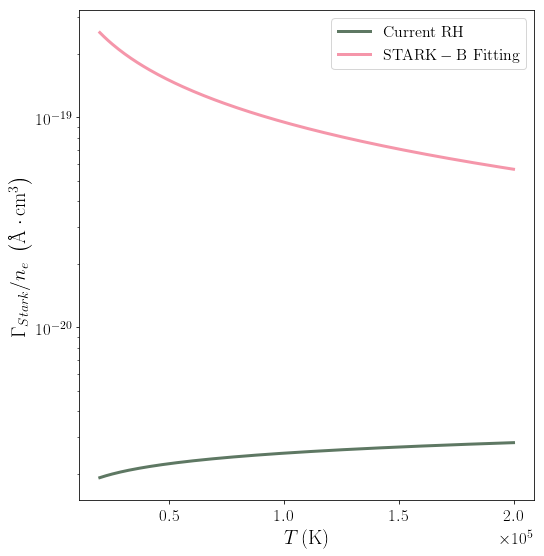

In [2]:
fig,ax1 = plt.subplots(figsize = (8,8))
ln_RH, = ax1.plot(T,FWHM_RH,color = '#36563C',label = r'$\mathrm{Current\ RH}$',linewidth=3,alpha=0.8)
ln_STARKB, = ax1.plot(T,FWHM_STARKB,color = '#F596AA',label = r'$\mathrm{STARK-B~Fitting}$',linewidth=3)
#eb_Bukic = ax1.errorbar(T_Bukvic,Gamma_Bukvic,error_Bukvic,fmt = 'o',capsize = 5,capthick=3,markersize = 6,color = '#FFC408',
#                        label = r'$S. Bukvi\acute{c}~\mathrm{et~al.}\ 2004$',linewidth=3)

#eb_Jones = ax1.errorbar(T_Jones,Gamma_Jones,xerr = Terror_Jones,yerr = Gerror_Jones,fmt = 'v',capsize = 5,capthick=3,markersize = 6,color = '#90B44B',
#                        label = r'$Jones~\mathrm{et~al.}\ 1972$',linewidth=3)

#eb_Fleurier = ax1.errorbar(T_Fleurier,Gamma_Fleurier,yerr = Gerror_Fleurier,fmt = '^',capsize = 5,capthick=3,markersize = 6,color = '#66BAB7',
#                           label = r'$Fleurier~\mathrm{et~al.}\ 1977$',linewidth=3)

#eb_Chapelle = ax1.errorbar(T_Chapelle,Gamma_Chapelle,yerr = Gerror_Chapelle,fmt = 's',capsize = 5,capthick=3,markersize = 6,color = '#113285',
#                           label = r'$Chapelle \left(Jones~\mathrm{et~al.}\ 1972\right)$',linewidth=3)

ax1.set_ylabel(r'$\Gamma_{Stark}/n_e\ \left(\mathrm{\AA}\cdot\mathrm{cm^3}\right)$',fontsize=20)
ax1.set_xlabel(r'$T \left(\mathrm{K}\right)$',fontsize = 20)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(50000))
formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax1.xaxis.set_major_formatter(formatter)
#leg = [ln_RH,ln_STARKB,eb_Bukic,eb_Jones,eb_Fleurier,eb_Chapelle]
leg = [ln_RH,ln_STARKB]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'upper right',fontsize = 16)
ax1.set_yscale('log')
ax1.tick_params(labelsize=17)
ax1.yaxis.get_offset_text().set_fontsize(17)
ax1.xaxis.get_offset_text().set_fontsize(17)
plt.subplots_adjust(bottom = 0.1,left=0.16,right=0.95,top=0.95)
plt.savefig(fname = '../figs/SB_Si.eps', dpi = 300, format = 'eps')